<a href="https://colab.research.google.com/github/LeQuXi/AI_lequxi/blob/main/AI_LAB1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


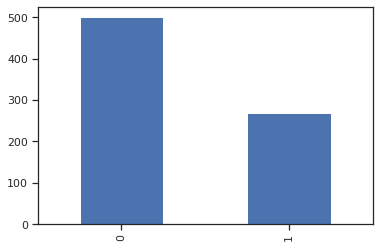

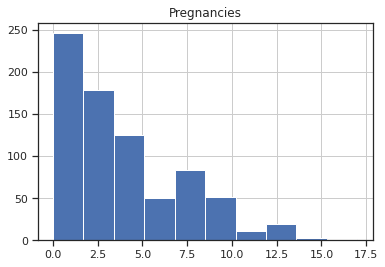

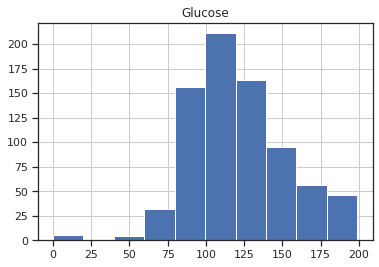

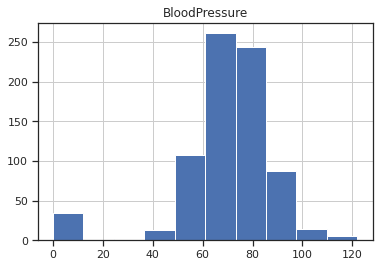

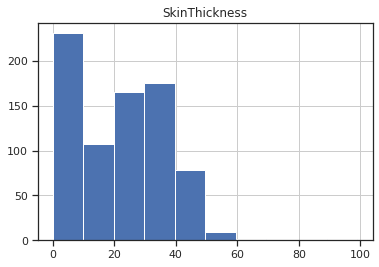

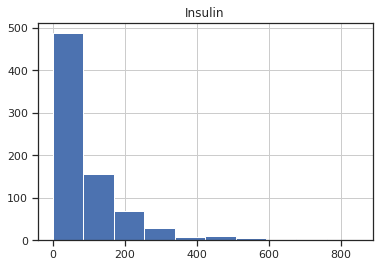

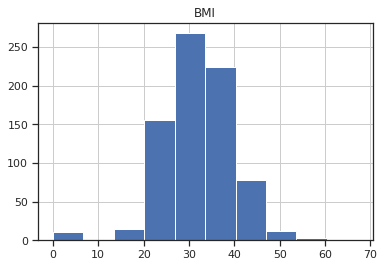

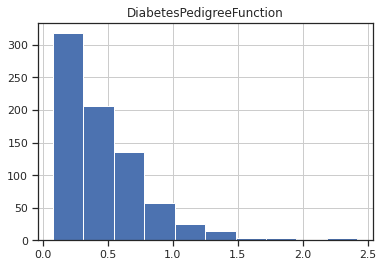

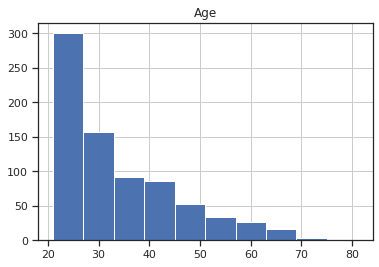

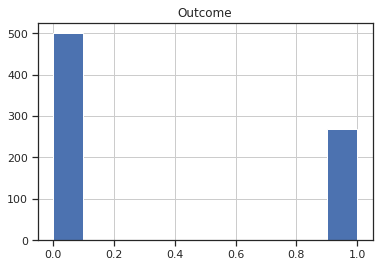

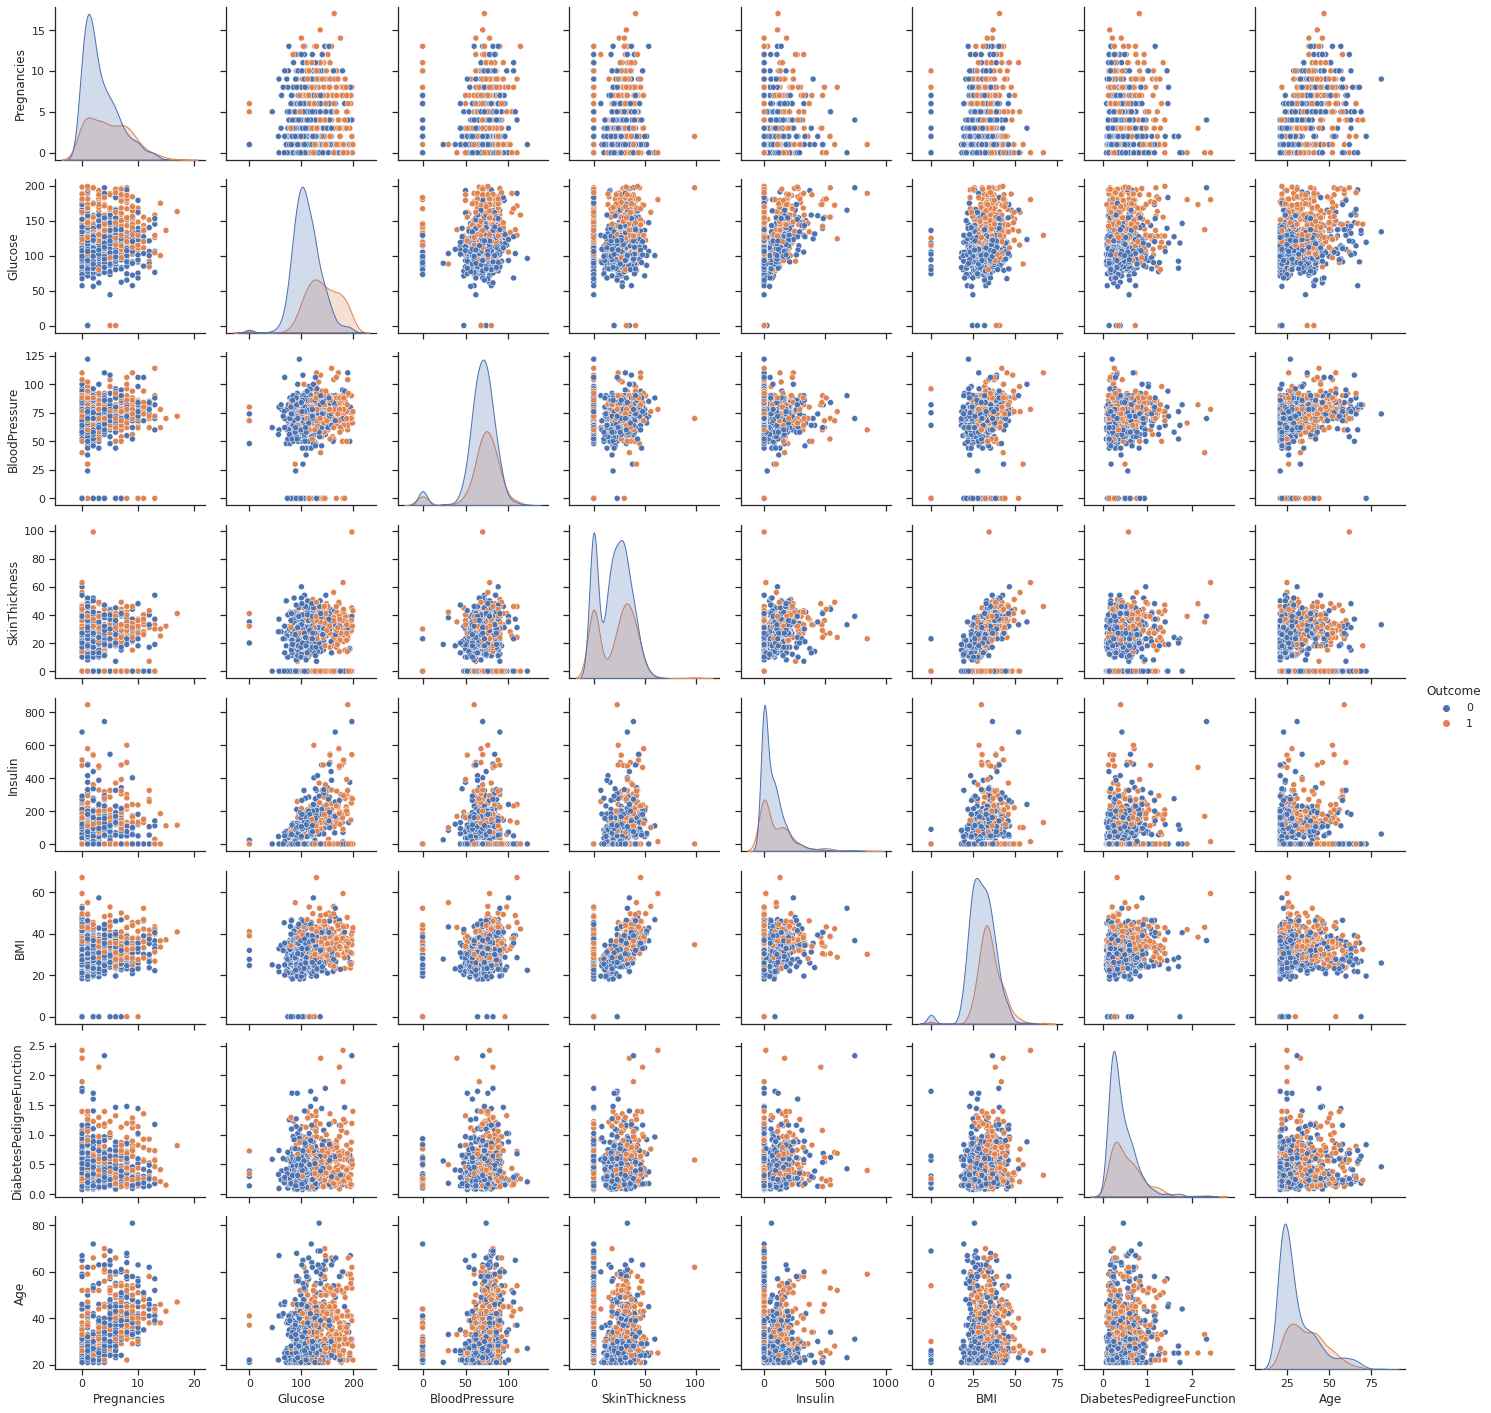

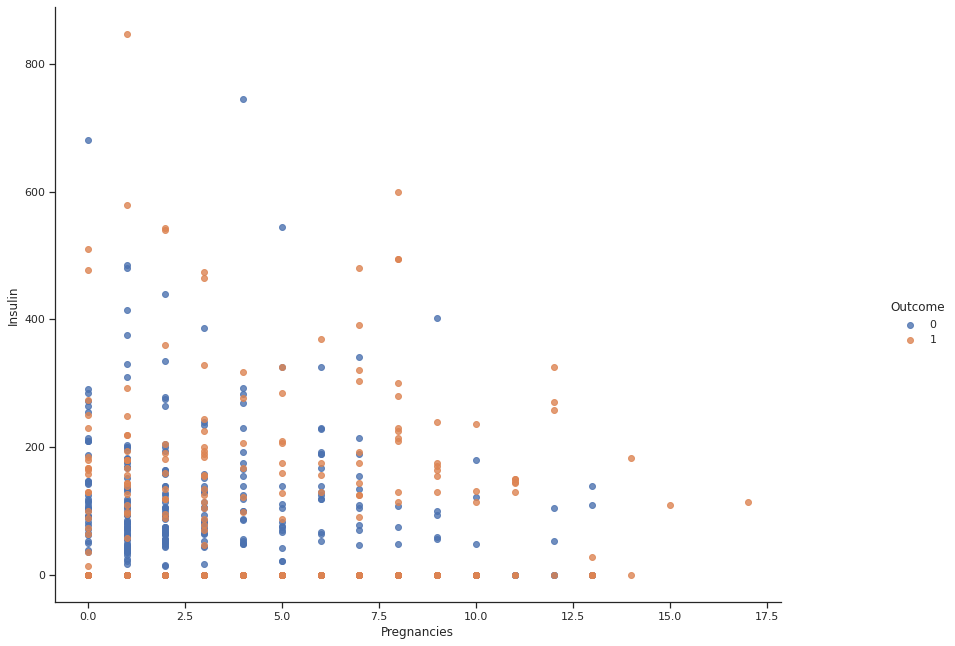

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


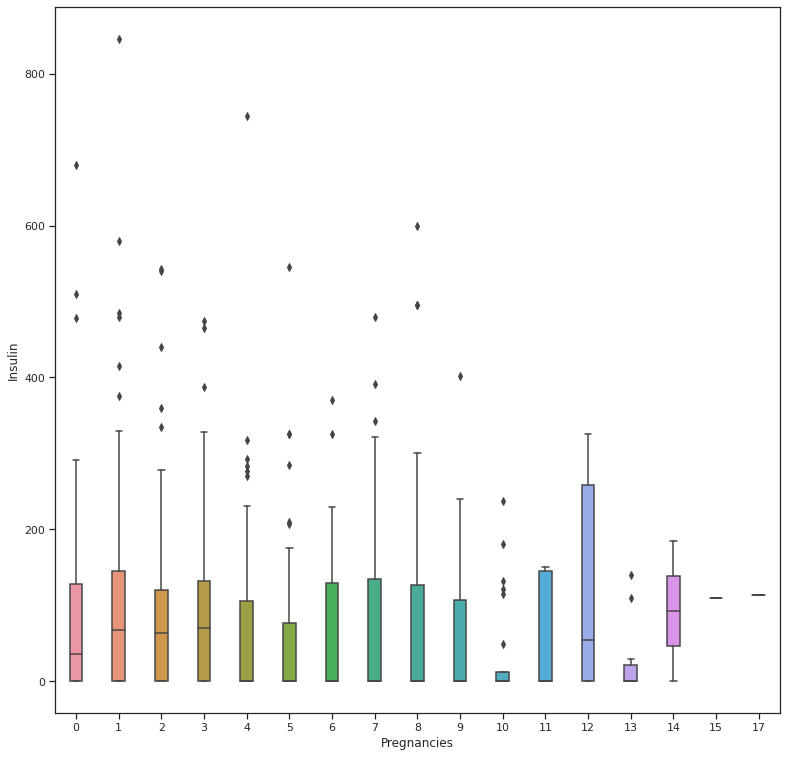

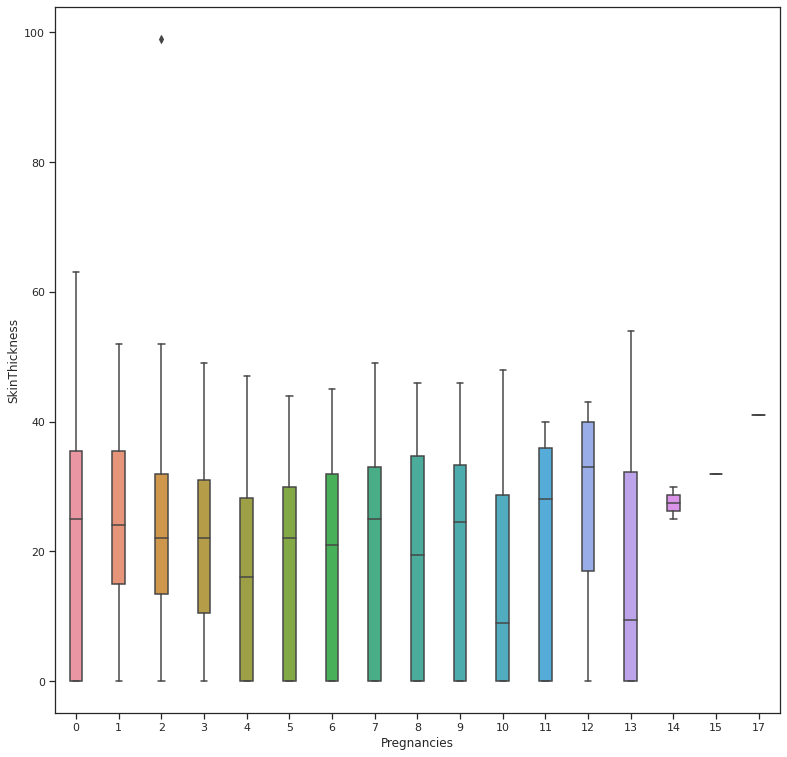

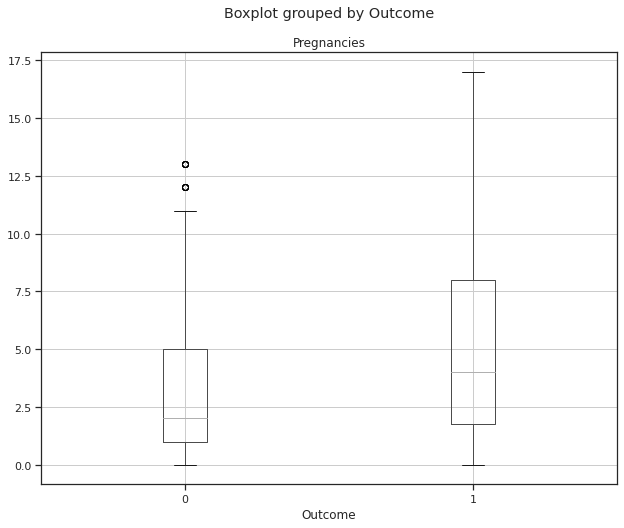

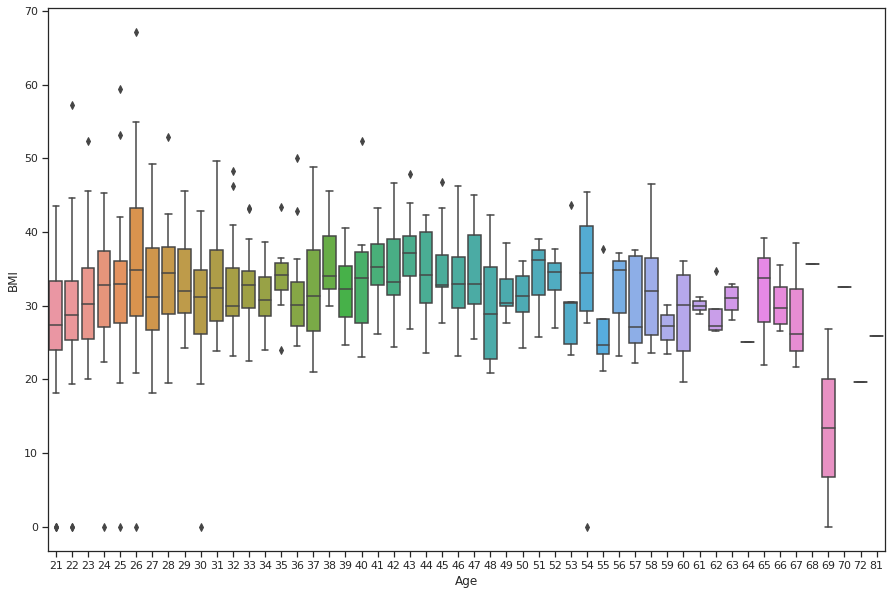

--------------Coveriance Between continuous attributes------------- 
                           Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.947131       9.214538   
Glucose                     13.947131  1022.248314      94.430956   
BloodPressure                9.214538    94.430956     374.647271   
SkinThickness               -4.390041    29.239183      64.029396   
Insulin                    -28.555231  1220.935799     198.378412   
BMI                          0.469774    55.726987      43.004695   
DiabetesPedigreeFunction    -0.037426     1.454875       0.264638   
Age                         21.570620    99.082805      54.523453   
Outcome                      0.356618     7.115079       0.600697   

                          SkinThickness       Insulin         BMI  \
Pregnancies                   -4.390041    -28.555231    0.469774   
Glucose                       29.239183   1220.935799   55.726987   
BloodPressure                 64

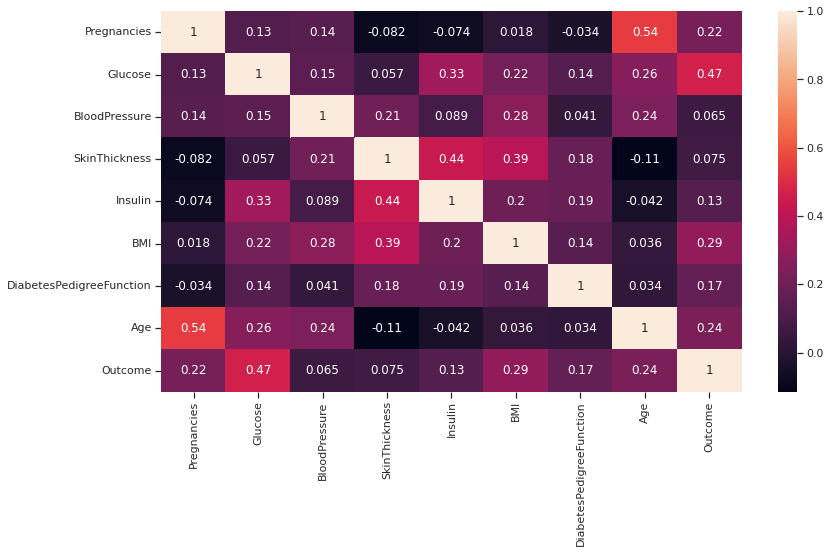

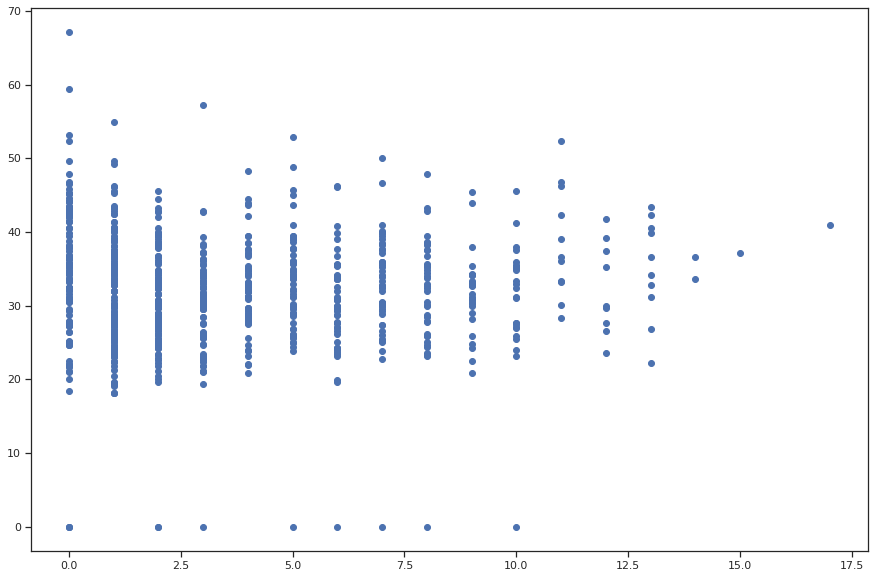

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import collections
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as p


dataset = pd.read_csv("diabetes2.csv")
df = pd.DataFrame({"dataset.csv"})

print(dataset.head(60))

print("------NUMBER OF VALUES------")
print( dataset.count(axis = 0))

print("------DESCRIP------")
df.describe()
print("------CARDINALITY------")
print( dataset.nunique(axis = 0, dropna = True))

df = pd.DataFrame(dataset)
print ("------DATASET MAXIMUM-----")
print( df.max())

print ("------DATASET MINIMUM-----")
print( df.min())

print("------DATASET AVERAGE------")
print( df.mean())

print("------DATASET MEDIAN------")
print( df.median())

print("------Standard DEVIATION------")
print( df.std(axis = 0, skipna = True))

print("------Pregnancies QUARTILES------")
print(dataset['Pregnancies'].quantile([0.25,0.75]))

print("------Glucose QUARTILES------")
print(dataset['Glucose'].quantile([0.25,0.75]))

print("------BloodPressure QUARTILES------")
print(dataset['BloodPressure'].quantile([0.25,0.75]))

print("------SkinThickness QUARTILES------")
print(dataset['SkinThickness'].quantile([0.25,0.75]))



print("------Insulin QUARTILES------")
print(dataset['Insulin'].quantile([0.25,0.75]))

print("------BMI QUARTILES------")
print(dataset['BMI'].quantile([0.25,0.75]))

print("------DiabetesPedigreeFunction QUARTILES------")
print(dataset['DiabetesPedigreeFunction'].quantile([0.25,0.75]))

print("------Age QUARTILES------")
print(dataset['Age'].quantile([0.25,0.75]))

print("------Outcome QUARTILES------")
print(dataset['Outcome'].quantile([0.25,0.75]))

dataset_mode = dataset.mode();
print("-----------Mode-------- \n", dataset_mode, "\n")
dataset_frequency = collections.Counter(dataset["Age"]).most_common(1)
print("---------Dataset Mode Frequency--------- \n", dataset_frequency)

data = dataset["Age"].value_counts(normalize = True) * 100
print ("------------First Mode Percentage----------- \n", data[:1])

dataset_frequency = collections.Counter(dataset["Age"]).most_common()[1]
print("------------Second Mode Frequency ----------- \n", dataset_frequency)

data = dataset["Age"].value_counts(normalize = True) * 100
print("------------Second Mode Percentage----------- \n", data[:1])


data_plot_Country = dataset["Outcome"].value_counts().plot(kind='bar');


dataset.hist(column = "Pregnancies")
dataset.hist(column = "Glucose")
dataset.hist(column = "BloodPressure")
dataset.hist(column = "SkinThickness")
dataset.hist(column = "Insulin")
dataset.hist(column = "BMI")
dataset.hist(column = "DiabetesPedigreeFunction")
dataset.hist(column = "Age")
dataset.hist(column = "Outcome")

dataset.fillna(dataset.mean(), inplace=True)
dataset_missing = dataset.isna()
percentage_nan = dataset_missing.mean().round(4)*100
print("Percentage of missing values \n", percentage_nan, "\n")



sns.set(style="ticks")
sns.pairplot(dataset, hue="Outcome")
sns.lmplot('Pregnancies', 'Insulin', dataset, hue='Outcome', fit_reg=False)
fig = p.gcf()
fig.set_size_inches(15, 10)
p.show()

fig = p.figure(1, figsize=(13, 13))
bp = sns.boxplot(x="Pregnancies", y="Insulin", width=0.3,  data=dataset)
fig = p.figure(2, figsize=(13, 13))
bp = sns.boxplot(x="Pregnancies", y="SkinThickness", width=0.3,  data=dataset)
dataset.boxplot(figsize=(10,8),column='Pregnancies',by ='Outcome')
p.show()
p.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=dataset)
p.show()

print("--------------Coveriance Between continuous attributes------------- \n", df.cov())
print("--------------Correlation ------------- \n", df.corr())
corrMatrix = df.corr()
fig = p.figure(5, figsize=(13, 7))
cr = sns.heatmap(corrMatrix, annot=True)
print ( cr)

p.subplots(figsize=(15,10))
p.scatter(x='Pregnancies', y='BMI', data=dataset)
p.show()





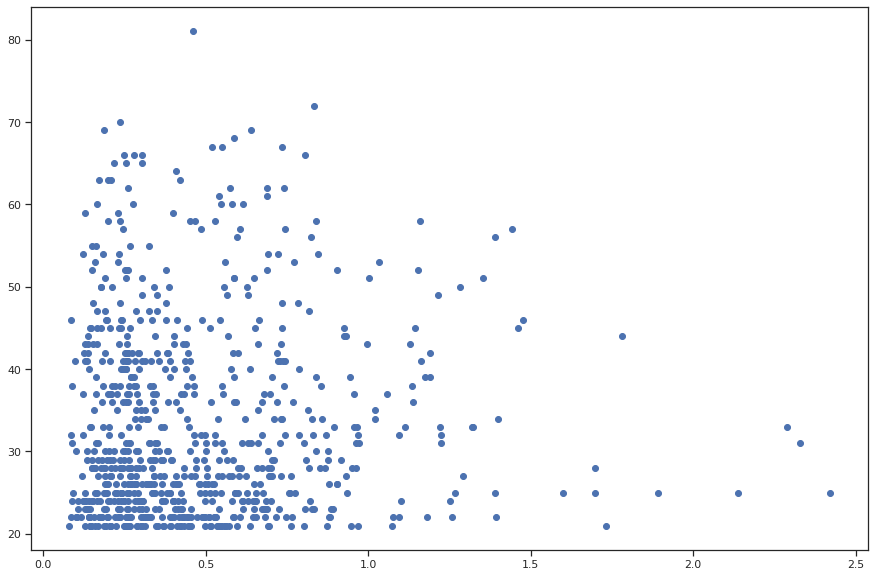

In [24]:
p.subplots(figsize=(15,10))
p.scatter(x='DiabetesPedigreeFunction', y='Age', data=dataset)
p.show()

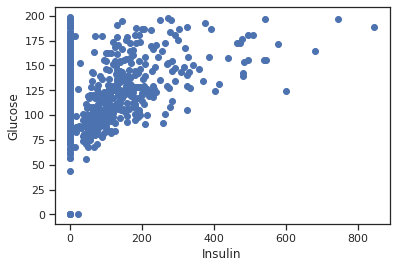

In [27]:
p.scatter('Insulin', y='Glucose', data=dataset)
p.xlabel('Insulin')
p.ylabel('Glucose');